In [1]:
import pandas as pd , matplotlib.pyplot as plt , seaborn as sns, missingno as msno


In [2]:

path = './data/Weather'

chicago = pd.read_csv(path + '/Chicago.csv')
new_york = pd.read_csv(path + '/NewYork.csv')
washington = pd.read_csv(path + '/WashingtonDC.csv')
dallas = pd.read_csv(path + '/Dallas.csv')
la = pd.read_csv(path + '/LosAngeles.csv')
miami = pd.read_csv(path + '/Miami.csv')
seattle = pd.read_csv(path + '/Seattle.csv')
atlanta = pd.read_csv(path + '/Atlanta.csv')

#make a copy of the original data and call them city_copy

chicago_copy = chicago.copy()   
new_york_copy = new_york.copy()
washington_copy = washington.copy()
dallas_copy = dallas.copy()
la_copy = la.copy()
miami_copy = miami.copy()
seattle_copy = seattle.copy()



C:\Users\zerra\AppData\Local\Temp\ipykernel_27600\4132131508.py:3: DtypeWarning: Columns (17,19,21,23,25,27,29,31,35,37,39,41,43,45,49,59,61,63,65,67,69,71) have mixed types. Specify dtype option on import or set low_memory=False.
  chicago = pd.read_csv(path + '/Chicago.csv')
C:\Users\zerra\AppData\Local\Temp\ipykernel_27600\4132131508.py:4: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,35,37,39,41,43,45,47,49,51,53,55,57,59,61,63,65,67,69,71,73,75,77,79,81,83,85,87,89,91,93,95,97,99,101,103,105,107,109,111,113,115,117,119,121,123) have mixed types. Specify dtype option on import or set low_memory=False.
  new_york = pd.read_csv(path + '/NewYork.csv')
C:\Users\zerra\AppData\Local\Temp\ipykernel_27600\4132131508.py:5: DtypeWarning: Columns (17,19,21,23,25,27,29,31,33,37,39,41,43,45,47,49,51,53,55,57,61,63,65,67,69,73,83,89,91,93,95,97,99,103,107,109,111,113) have mixed types. Specify dtype option on import or set low_memory=False.
  washington = pd.read_csv(path + '/WashingtonDC.cs

In [3]:
la_copy.head()  

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT13,WT13_ATTRIBUTES,WT14,WT14_ATTRIBUTES,WT16,WT16_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES
0,USW00093134,1906-04-01,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00093134,1906-04-02,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00093134,1906-04-03,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00093134,1906-04-04,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",76.0,",,6,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00093134,1906-04-05,34.0236,-118.2911,54.6,"LOS ANGELES DOWNTOWN USC, CA US",152.0,",,6,2400",NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,",,6",NaN,NaN,NaN,NaN


In [4]:
def keep_columns (df):
    df = df.copy()  
    df = df[['DATE', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]
    df['DATE'] = pd.to_datetime(df['DATE'])  # Convert 'DATE' to datetime
    df.set_index('DATE', inplace=True)
    
    return df

# Data Preparation


### 1) Selecting data based on years from 1992 to 2012

In [5]:
cities = ['chicago', 'new_york', 'washington', 'dallas', 'la', 'miami', 'seattle', 'atlanta']

for city in cities:
    globals()[city] = keep_columns(globals()[city])

for city in cities:
    first_date = globals()[city].index.min()
    last_date = globals()[city].index.max()
    print(f"{city.title()}: First Date - {first_date}, Last Date - {last_date}")

Chicago: First Date - 1928-02-29 00:00:00, Last Date - 2023-11-09 00:00:00
New_York: First Date - 1869-01-01 00:00:00, Last Date - 2023-11-09 00:00:00
Washington: First Date - 1936-09-01 00:00:00, Last Date - 2023-11-09 00:00:00
Dallas: First Date - 1939-08-01 00:00:00, Last Date - 2023-11-09 00:00:00
La: First Date - 1906-04-01 00:00:00, Last Date - 2023-11-09 00:00:00
Miami: First Date - 1927-01-05 00:00:00, Last Date - 2023-09-30 00:00:00
Seattle: First Date - 1948-01-01 00:00:00, Last Date - 2023-11-08 00:00:00
Atlanta: First Date - 1930-01-01 00:00:00, Last Date - 2023-11-09 00:00:00


#### The dataset of movie releases from CMU includes data up to the year 2012. To align our weather data analysis with this period, we'll match the same timeframe. Given that our starting point is 2012, we'll go back 20 years, which brings us to the year 1992. Thus, we'll consider weather data spanning from 1992 to 2012 for our analysis, ensuring it corresponds with the time range covered by the CMU movie releases dataset.

In [6]:
start_date = pd.to_datetime(f'{1992}-01-01')
end_date = pd.to_datetime(f'{2012}-12-31')

for city in cities:
    # Filter the dataframe based on the date range
    globals()[city] = globals()[city][(globals()[city].index >= start_date) & (globals()[city].index <= end_date)]

### 2 ) Adjusting temperatures 

In the oroginal dataset, the max and min tempertaures are actually tenth of the real temperatures, so we will have to adapt them. 

In [7]:
for city in cities:
    # Convert temperature columns to Celsius
    globals()[city]['TMIN'] = globals()[city]['TMIN'] / 10
    globals()[city] = globals()[city].rename(columns={'TMIN': 'TMIN (°C)'})
    
    globals()[city]['TMAX'] = globals()[city]['TMAX'] / 10
    globals()[city] = globals()[city].rename(columns={'TMAX': 'TMAX (°C)'})
    
    globals()[city] = globals()[city].rename(columns={'PRCP': 'PRCP (mm)'})

    

### 3) Handling Missing data

c:\Users\zerra\.conda\envs\ada\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
c:\Users\zerra\.conda\envs\ada\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
c:\Users\zerra\.conda\envs\ada\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
c:\Users\zerra\.conda\envs\ada\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
c:\Users\zerra\.conda\envs\ada\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an exis

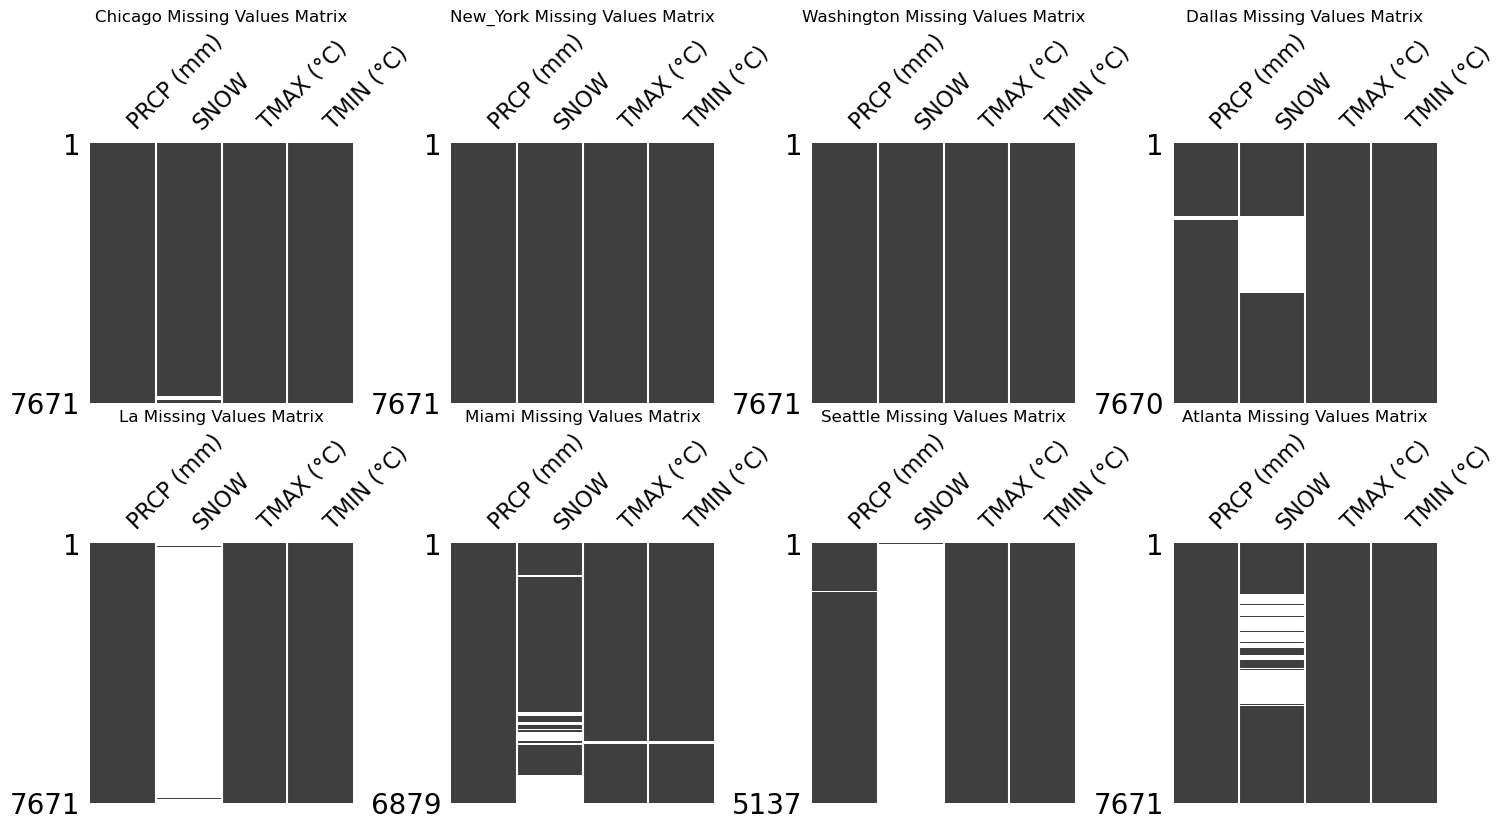

In [8]:

# Determine the layout of the subplots
n_rows = 2  # Adjust as needed
n_cols = (len(cities) + 1) // 2  # Adjust to fit all cities

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
fig.tight_layout(pad=4.0, h_pad=8.0)  # Adjust h_pad to add space between rows

# Flatten the axes array for easy iteration if it's 2D
axes = axes.flatten()

for i, city in enumerate(cities):
    # Plot missing values matrix using missingno
    msno.matrix(globals()[city], ax=axes[i])
    axes[i].set_title(f'{city.title()} Missing Values Matrix')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()

In [9]:
for city in cities:
    # Count missing values for each column in the current city
    missing_counts = globals()[city].isnull().sum()

    # Display missing value counts for the current city
    print(f'{city.title()} Missing Value Counts:')
    print(missing_counts)
    print('\n' + '-'*30 + '\n')  


Chicago Missing Value Counts:
PRCP (mm)      0
SNOW         121
TMAX (°C)      1
TMIN (°C)      0
dtype: int64

------------------------------

New_York Missing Value Counts:
PRCP (mm)    0
SNOW         0
TMAX (°C)    0
TMIN (°C)    0
dtype: int64

------------------------------

Washington Missing Value Counts:
PRCP (mm)    0
SNOW         0
TMAX (°C)    0
TMIN (°C)    0
dtype: int64

------------------------------

Dallas Missing Value Counts:
PRCP (mm)     134
SNOW         2262
TMAX (°C)      12
TMIN (°C)      12
dtype: int64

------------------------------

La Missing Value Counts:
PRCP (mm)       0
SNOW         7609
TMAX (°C)       0
TMIN (°C)       0
dtype: int64

------------------------------

Miami Missing Value Counts:
PRCP (mm)       3
SNOW         1282
TMAX (°C)      81
TMIN (°C)      80
dtype: int64

------------------------------

Seattle Missing Value Counts:
PRCP (mm)       8
SNOW         5130
TMAX (°C)       5
TMIN (°C)       5
dtype: int64

----------------------------

#### As we can see that in most datasets, the snow column has the most missing values especially in Los Angeles and Seattle. This comes from the fact that cities with warm weather don't have snow so the entries in the datasets are missing, we therefor fill them with 0. As for the tempersture and the precipitation, we fill them using the average the immeddiate neighbours of each missing value. 

In [10]:

for city in cities:
    # Fill missing values in snow using forward fill
    globals()[city]['SNOW'].fillna(0, inplace=True)
    
    # Fill missing values in TMAX and TMIN using interpolation
    globals()[city]['TMAX (°C)'].interpolate(method='linear', inplace=True)
    globals()[city]['TMIN (°C)'].interpolate(method='linear', inplace=True)
    
    # Fill missing values in PRCP using forward fill
    globals()[city]['PRCP (mm)'].interpolate(method='linear', inplace=True)


### Missing values after handling them 

c:\Users\zerra\.conda\envs\ada\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
c:\Users\zerra\.conda\envs\ada\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
c:\Users\zerra\.conda\envs\ada\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
c:\Users\zerra\.conda\envs\ada\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(
c:\Users\zerra\.conda\envs\ada\lib\site-packages\missingno\missingno.py:61: UserWarning: Plotting a sparkline on an exis

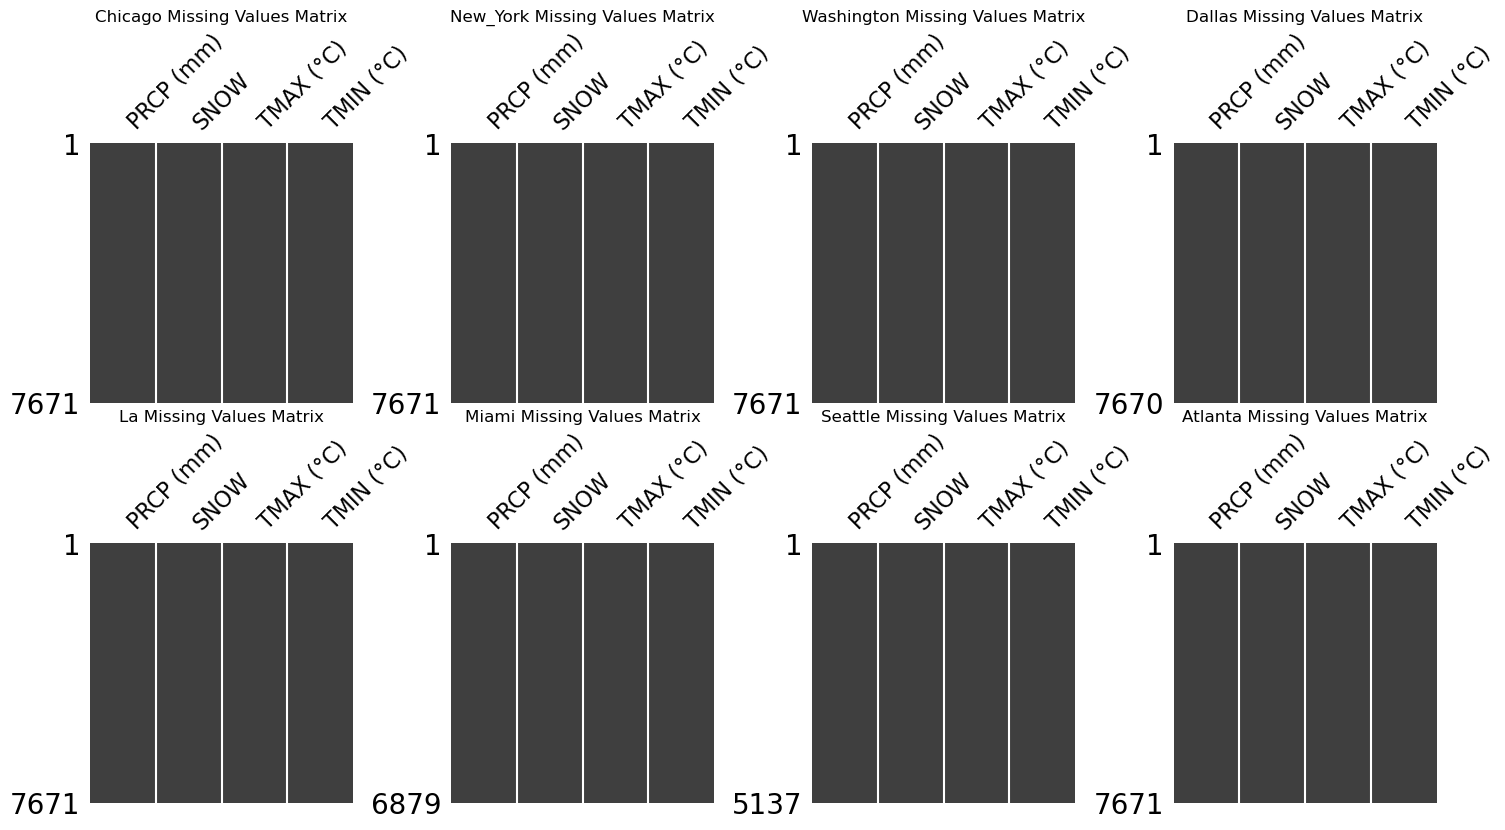

In [11]:
# Determine the layout of the subplots
n_rows = 2  # Adjust as needed
n_cols = (len(cities) + 1) // 2  # Adjust to fit all cities

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
fig.tight_layout(pad=4.0, h_pad=8.0)  # Adjust h_pad to add space between rows

# Flatten the axes array for easy iteration if it's 2D
axes = axes.flatten()

for i, city in enumerate(cities):
    # Plot missing values matrix using missingno
    msno.matrix(globals()[city], ax=axes[i])
    axes[i].set_title(f'{city.title()} Missing Values Matrix')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Show the plot
plt.show()

As we can see there is no missnig value anymore. 

In [12]:
for city in cities:
    # Calculate descriptive statistics for each column
    stats = globals()[city].describe()
    
    # Print the statistics
    print(f"{city.title()} Descriptive Statistics:")
    print(stats)
    print("\n" + "-"*65 + "\n")
    

Chicago Descriptive Statistics:
         PRCP (mm)         SNOW    TMAX (°C)    TMIN (°C)
count  7671.000000  7671.000000  7671.000000  7671.000000
mean     27.073915     2.626124    15.592869     6.631991
std      78.001913    16.126439    11.605918    10.409985
min       0.000000     0.000000   -23.900000   -28.900000
25%       0.000000     0.000000     6.100000    -1.100000
50%       0.000000     0.000000    16.700000     6.700000
75%      13.000000     0.000000    25.600000    15.600000
max    1453.000000   447.000000    41.100000    28.900000

-----------------------------------------------------------------

New_York Descriptive Statistics:
         PRCP (mm)         SNOW    TMAX (°C)    TMIN (°C)
count  7671.000000  7671.000000  7671.000000  7671.000000
mean     34.714379     2.023074    17.085908     8.991892
std      98.207645    18.367667     9.998021     9.054167
min       0.000000     0.000000   -12.200000   -18.900000
25%       0.000000     0.000000     8.900000     2.2000

### Creating average tempretaure column

In [13]:
for city in cities:
    globals()[city]['Tavg (°C)'] = globals()[city]['TMIN (°C)'] * (1/3) + globals()[city]['TMAX (°C)'] * (2/3)

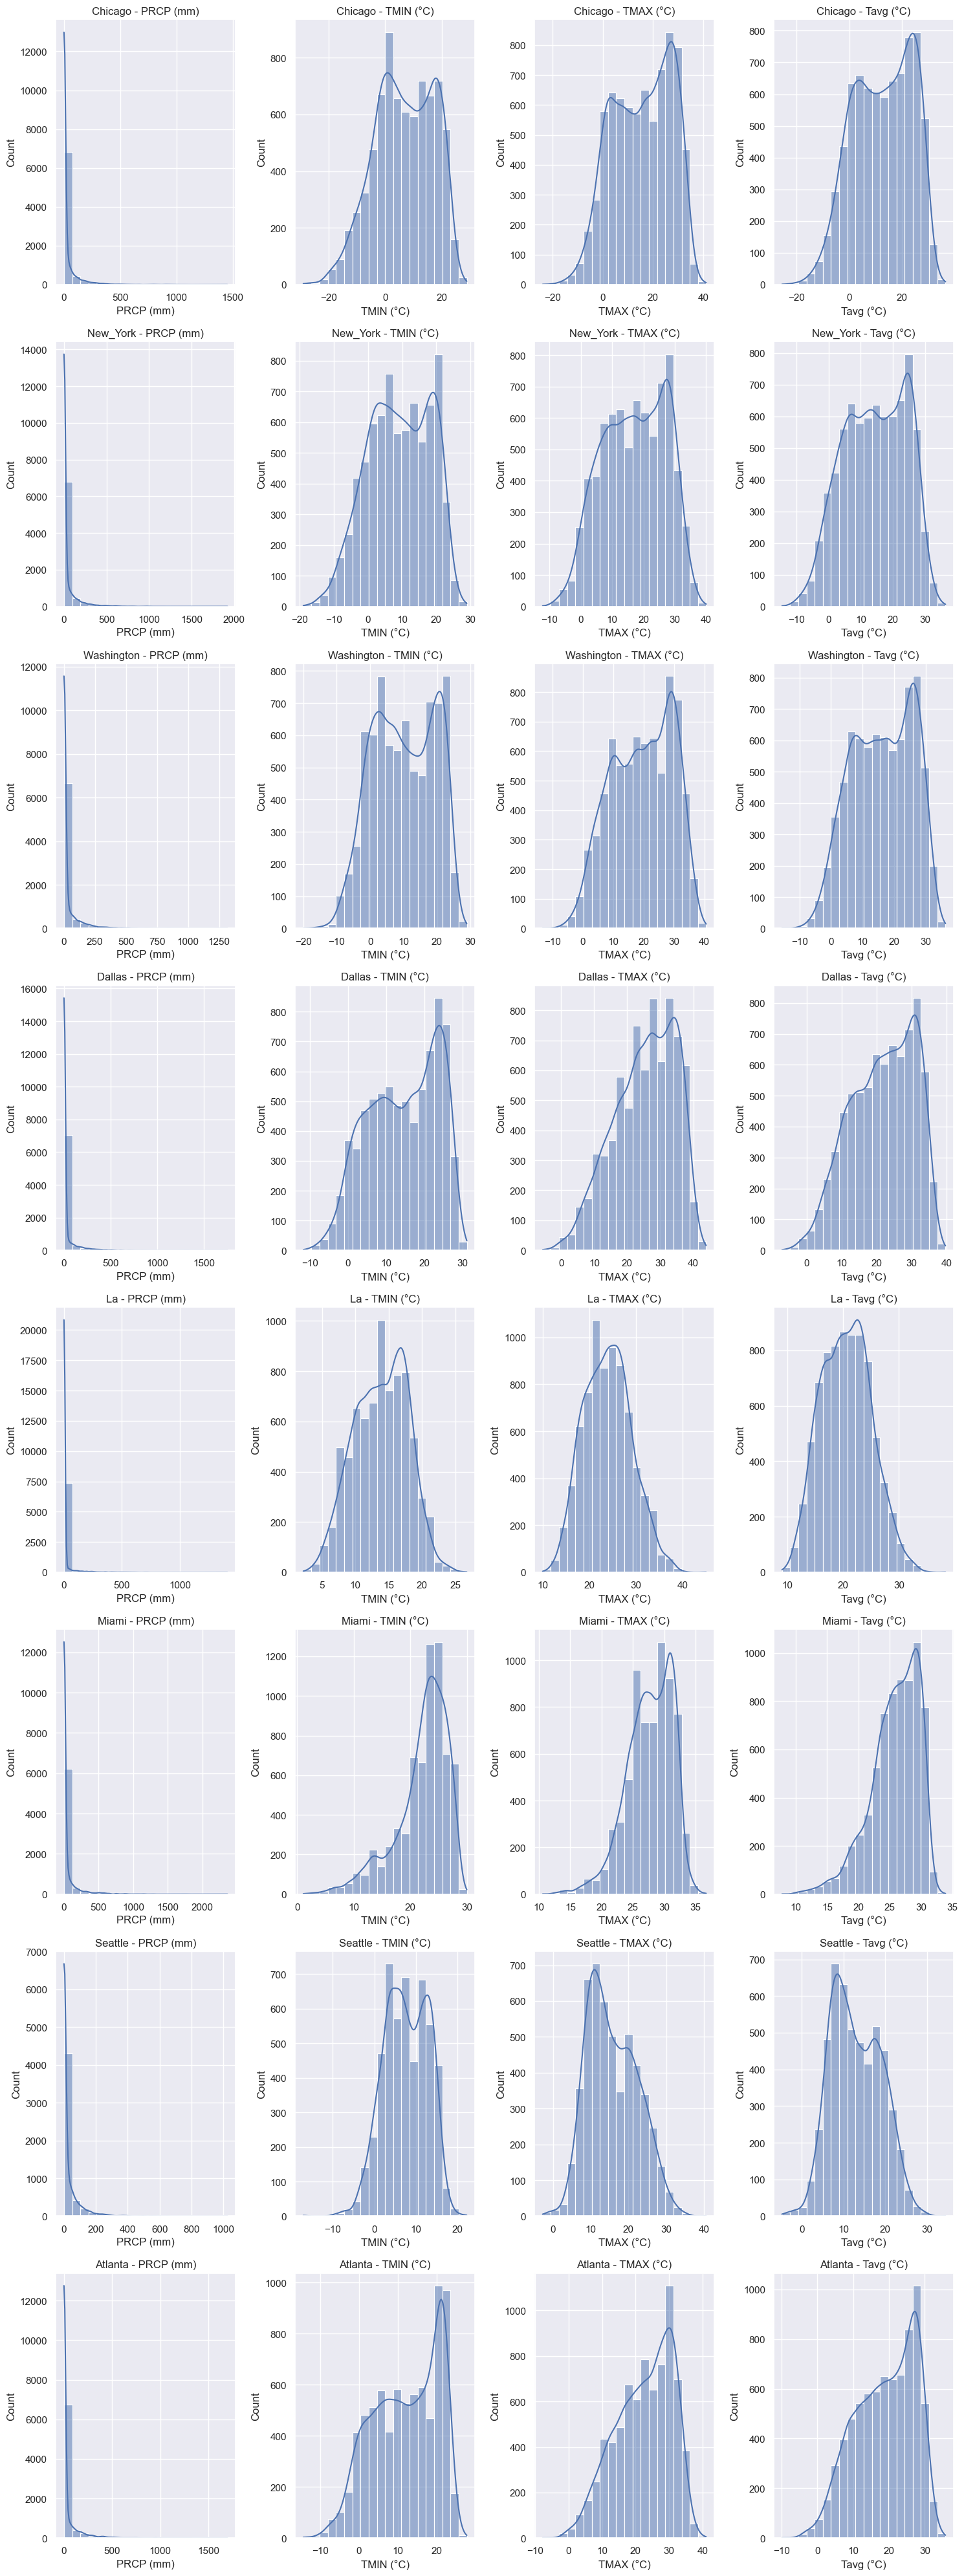

In [14]:


sns.set(style="darkgrid")

# Features to plot
features = ['PRCP (mm)', 'TMIN (°C)', 'TMAX (°C)', 'Tavg (°C)']

# Define the number of rows and columns based on the number of cities and features
n_rows = len(cities)
n_cols = len(features)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, city in enumerate(cities):
    df = globals()[city]
    for j, feature in enumerate(features):
        # Determine the correct axis based on the city and feature
        if n_rows > 1:
            ax = axes[i, j]
        else:
            ax = axes[j]

        sns.histplot(df[feature], bins=20, ax=ax, kde=True)
        ax.set_title(f'{city.title()} - {feature}')

plt.tight_layout()
plt.show()


The analysis of the datasets reveals several important discrepancies:

1) The reported precipitation values also raise concerns about their accuracy, particularly regarding the maximum amounts recorded. For instance, in New York, the maximum recorded precipitation is 1923 mm, which is inconsistent with the known record for the most precipitation in a 24-hour period. This record was set in Alvin, Texas, on July 25-26, 1979, with a total of 1,077 mm (42.32 inches) of rain. These discrepancies in precipitation data are likely due to measurement errors, and thus, careful handling and validation of such data are essential.

# Handling outliers 
 In this section we will get rid of the outliers as they have no real life meaning. For that we would use the previous records mentionned: 
   1) ELiminate the precipipation higher than 1077 mm. 

In [15]:

max_precip_mm = 1077  # Maximum precipitation in millimeters

for city in cities:
    # Convert temperature from Fahrenheit to Celsius
    df = globals()[city]

    # Filter out precipitation outliers
    df = df[df['PRCP (mm)'] <= max_precip_mm]


    # Update the global variable
    globals()[city] = df

### Plot of the data after removing outliers

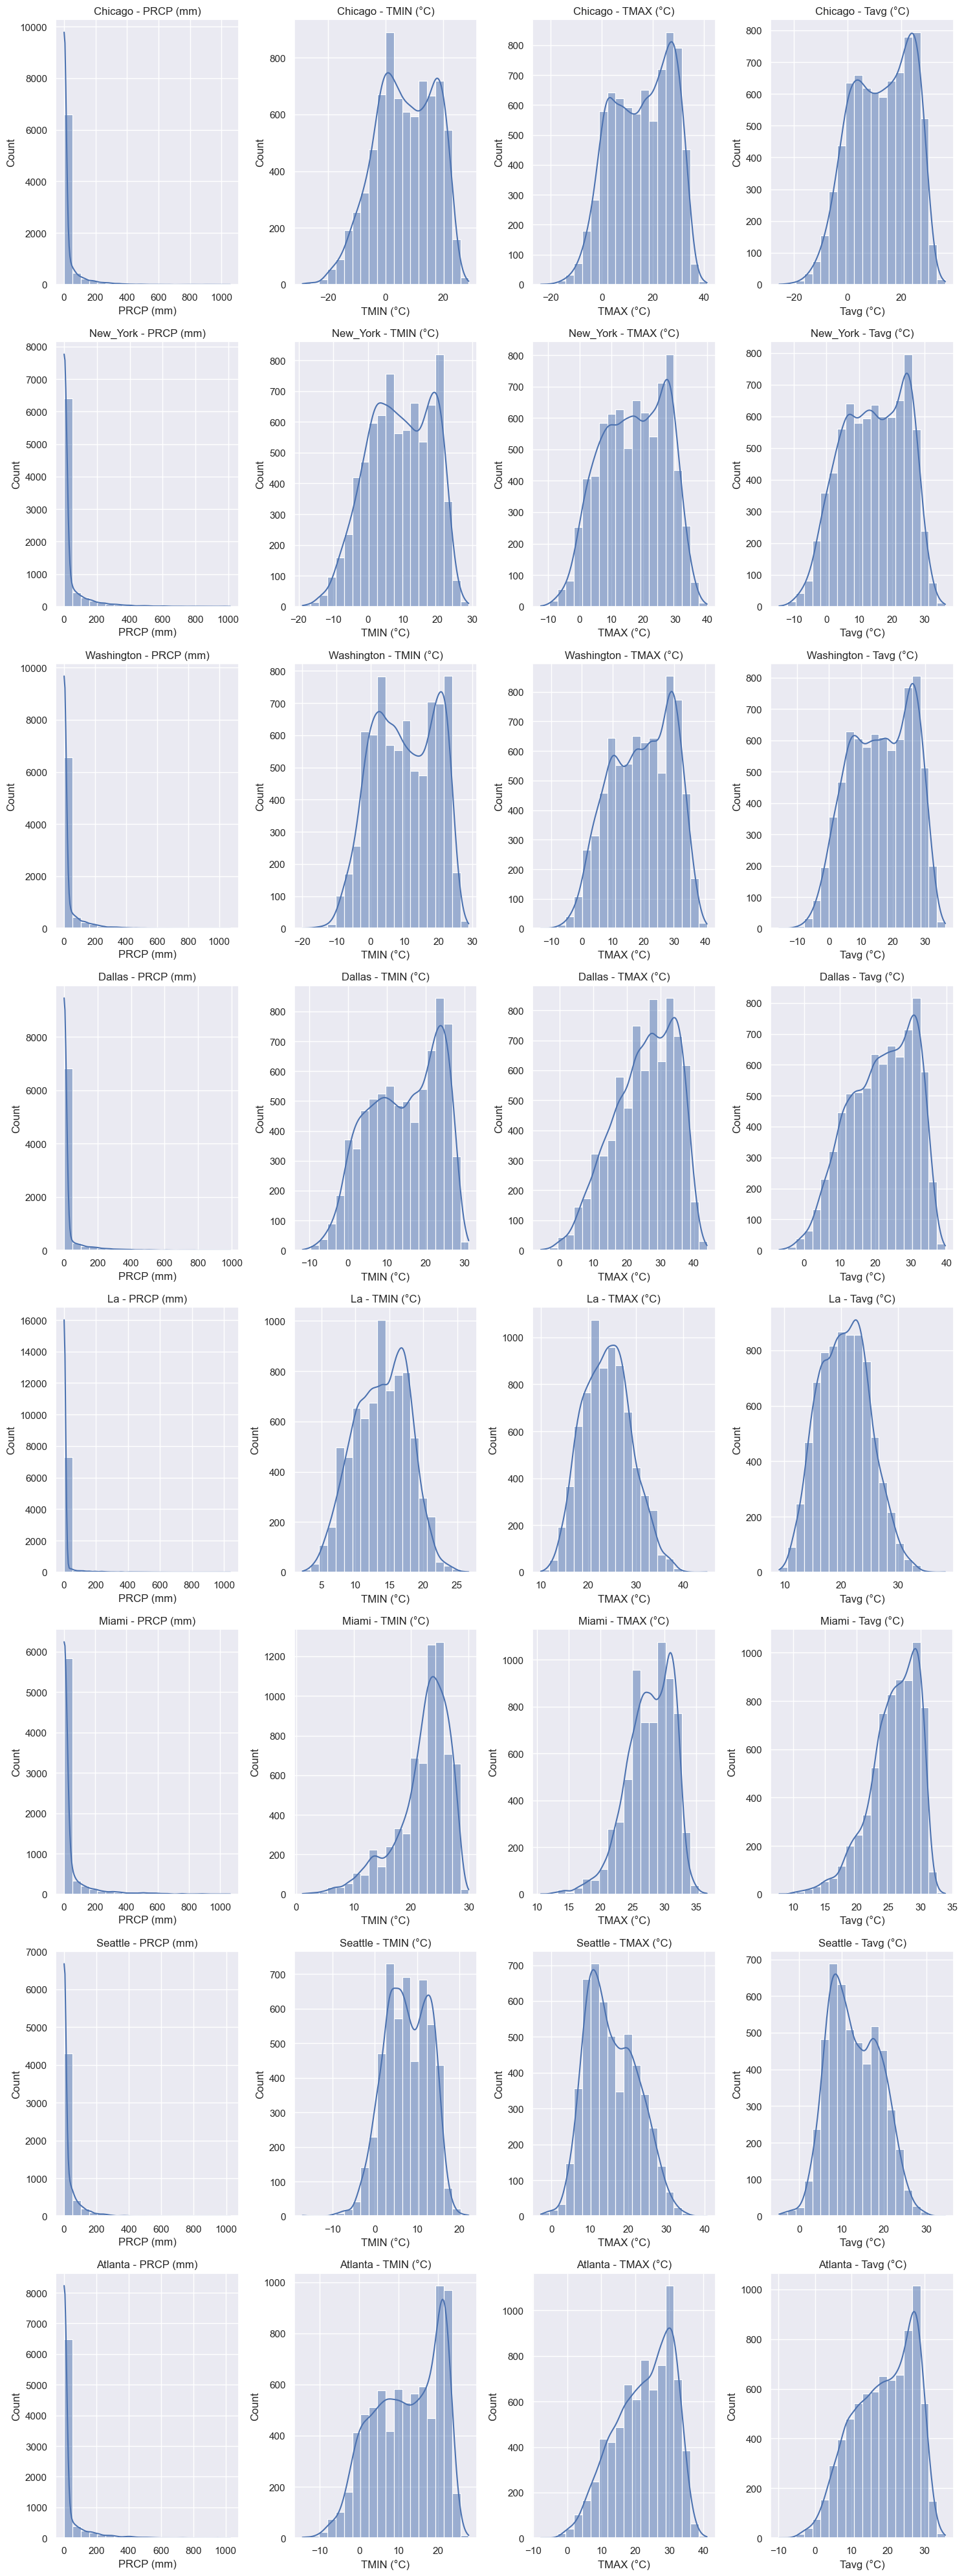

In [16]:

sns.set(style="darkgrid")

# Features to plot
features = ['PRCP (mm)', 'TMIN (°C)', 'TMAX (°C)', 'Tavg (°C)']

# Define the number of rows and columns based on the number of cities and features
n_rows = len(cities)
n_cols = len(features)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

for i, city in enumerate(cities):
    df = globals()[city]
    for j, feature in enumerate(features):
        # Determine the correct axis based on the city and feature
        if n_rows > 1:
            ax = axes[i, j]
        else:
            ax = axes[j]

        sns.histplot(df[feature], bins=20, ax=ax, kde=True)
        ax.set_title(f'{city.title()} - {feature}')

plt.tight_layout()
plt.show()

In [17]:
###

In [18]:
for city in cities:
    stats = globals()[city].describe()
    
    print(f"{city.title()} Descriptive Statistics:")
    print(stats)
    print("\n" + "-"*50 + "\n")

Chicago Descriptive Statistics:
         PRCP (mm)         SNOW    TMAX (°C)    TMIN (°C)    Tavg (°C)
count  7669.000000  7669.000000  7669.000000  7669.000000  7669.000000
mean     26.733472     2.626809    15.589034     6.628348    12.602138
std      75.083300    16.128486    11.604999    10.408898    11.091730
min       0.000000     0.000000   -23.900000   -28.900000   -25.566667
25%       0.000000     0.000000     6.100000    -1.100000     3.533333
50%       0.000000     0.000000    16.700000     6.700000    13.333333
75%      13.000000     0.000000    25.600000    15.600000    22.233333
max    1057.000000   447.000000    41.100000    28.900000    36.500000

--------------------------------------------------

New_York Descriptive Statistics:
         PRCP (mm)         SNOW    TMAX (°C)    TMIN (°C)    Tavg (°C)
count  7665.000000  7665.000000  7665.000000  7665.000000  7665.000000
mean     33.705284     2.024658    17.084866     8.989746    14.386493
std      90.986677    18.37476

In [19]:
la.head()

,PRCP (mm),SNOW,TMAX (°C),TMIN (°C),Tavg (°C)
DATE,,,,,
1992-01-01,0.0,0.0,21.1,8.9,17.033333
1992-01-02,3.0,0.0,22.2,13.3,19.233333
1992-01-03,48.0,0.0,17.8,10.0,15.200000
1992-01-04,3.0,0.0,19.4,11.1,16.633333
1992-01-05,320.0,0.0,15.0,9.4,13.133333


## Overall data description and visualization 

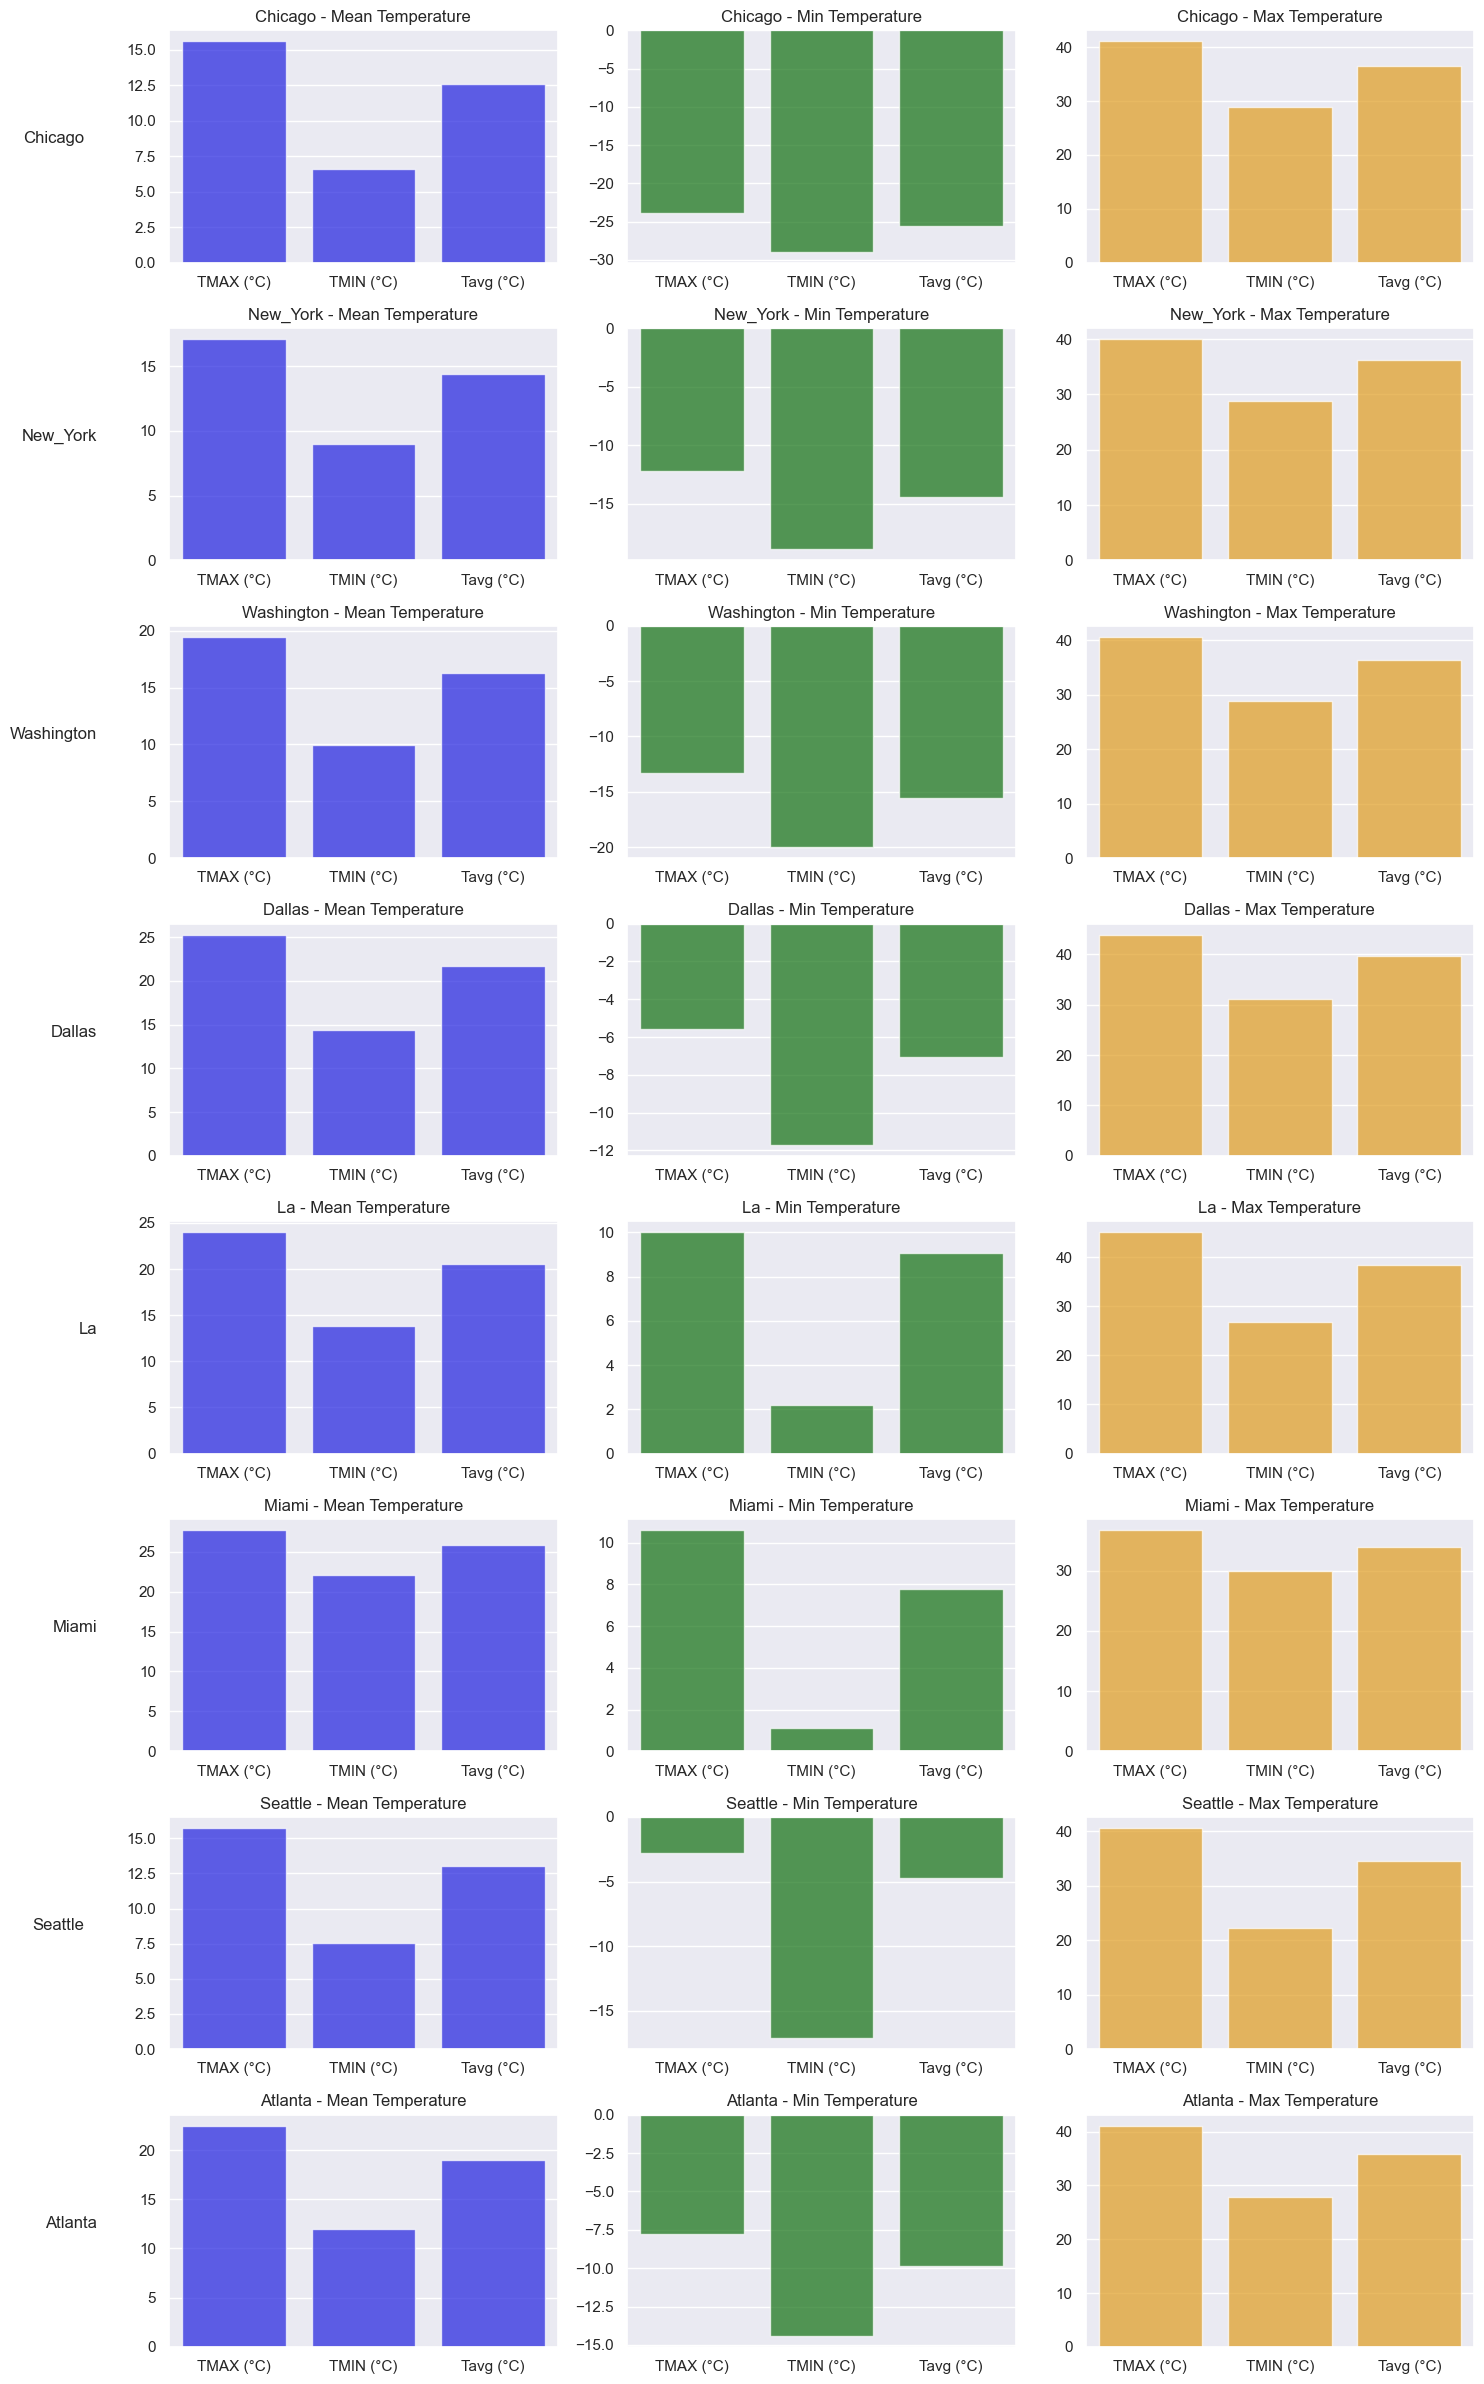

In [20]:
# Create subplots
fig, axes = plt.subplots(nrows=len(cities), ncols=3, figsize=(15, 3 * len(cities)))

for i, city in enumerate(cities):
    # Select relevant columns
    selected_columns = [ 'TMAX (°C)', 'TMIN (°C)', 'Tavg (°C)']
    
    # Calculate mean, min, and max values
    mean_values = globals()[city][selected_columns].mean()
    min_values = globals()[city][selected_columns].min()
    max_values = globals()[city][selected_columns].max()

    # Plot mean values using Seaborn barplot
    sns.barplot(x=mean_values.index, y=mean_values.values, ax=axes[i, 0], color='blue', alpha=0.7)
    axes[i, 0].set_title(f'{city.title()} - Mean Temperature')
    axes[i, 0].set_ylabel(city.title(), rotation=0, labelpad=30, ha='right')  # Add city name to the left
    
    # Plot min values using Seaborn barplot
    sns.barplot(x=min_values.index, y=min_values.values, ax=axes[i, 1], color='green', alpha=0.7)
    axes[i, 1].set_title(f'{city.title()} - Min Temperature')
    axes[i, 1].set_ylabel('')  # Remove ylabel for better alignment
    
    # Plot max values using Seaborn barplot
    sns.barplot(x=max_values.index, y=max_values.values, ax=axes[i, 2], color='orange', alpha=0.7)
    axes[i, 2].set_title(f'{city.title()} - Max Temperature')
    axes[i, 2].set_ylabel('')  # Remove ylabel for better alignment

plt.tight_layout()
plt.show()

In [21]:
#number of entries per city
for city in cities:
    print(f"{city.title()} Entries: {globals()[city].shape[0]}")
    

Chicago Entries: 7669
New_York Entries: 7665
Washington Entries: 7669
Dallas Entries: 7665
La Entries: 7670
Miami Entries: 6869
Seattle Entries: 5137
Atlanta Entries: 7666


## Weather classification 

##### Having gained valuable insights into the ranges of each feature, particularly focusing on the MIN and MAX values, our next objective is to create a binary classification column. Specifically, we aim to classify whether the weather for a given date can be categorized as either **GOOD** or **BAD** based on our own assumptions.  

In [22]:
for city in cities:
    city_data = globals()[city]

    # Calculate medians for each column
    prcp_mean = city_data['PRCP (mm)'].mean()
    tmin_mean = city_data['TMIN (°C)'].mean()
    tmax_mean = city_data['TMAX (°C)'].mean()
    snow_mean = city_data['SNOW'].mean()    


    # Apply the median thresholds
    city_data['WEATHER_STATUS'] = (
        (city_data['PRCP (mm)'] < prcp_mean) &  
        (city_data['TMIN (°C)'] > tmin_mean)  & 
        (city_data['TMAX (°C)'] < tmax_mean) &
        (city_data['SNOW'] <= snow_mean)
         # Snowfall at or below mean
    ).astype(int)

    # Update the global variable
    globals()[city] = city_data



In [23]:
la.head()

,PRCP (mm),SNOW,TMAX (°C),TMIN (°C),Tavg (°C),WEATHER_STATUS
DATE,,,,,,
1992-01-01,0.0,0.0,21.1,8.9,17.033333,0
1992-01-02,3.0,0.0,22.2,13.3,19.233333,0
1992-01-03,48.0,0.0,17.8,10.0,15.200000,0
1992-01-04,3.0,0.0,19.4,11.1,16.633333,0
1992-01-05,320.0,0.0,15.0,9.4,13.133333,0


In [24]:
#for each city count the number of days with good weather of good and bad weather

for city in cities:
    # Calculate the number of days with good weather and bad weather
    good_days = globals()[city]['WEATHER_STATUS'].sum()
    bad_days = len(globals()[city]) - good_days

    # Print the results
    print(f'{city.title()}  Total days : {len(globals()[city])} - Good Weather Days: {good_days}, Bad Weather Days: {bad_days}')
    print('-'*50)






Chicago  Total days : 7669 - Good Weather Days: 133, Bad Weather Days: 7536
--------------------------------------------------
New_York  Total days : 7665 - Good Weather Days: 129, Bad Weather Days: 7536
--------------------------------------------------
Washington  Total days : 7669 - Good Weather Days: 179, Bad Weather Days: 7490
--------------------------------------------------
Dallas  Total days : 7665 - Good Weather Days: 190, Bad Weather Days: 7475
--------------------------------------------------
La  Total days : 7670 - Good Weather Days: 1001, Bad Weather Days: 6669
--------------------------------------------------
Miami  Total days : 6869 - Good Weather Days: 689, Bad Weather Days: 6180
--------------------------------------------------
Seattle  Total days : 5137 - Good Weather Days: 226, Bad Weather Days: 4911
--------------------------------------------------
Atlanta  Total days : 7666 - Good Weather Days: 183, Bad Weather Days: 7483
--------------------------------------

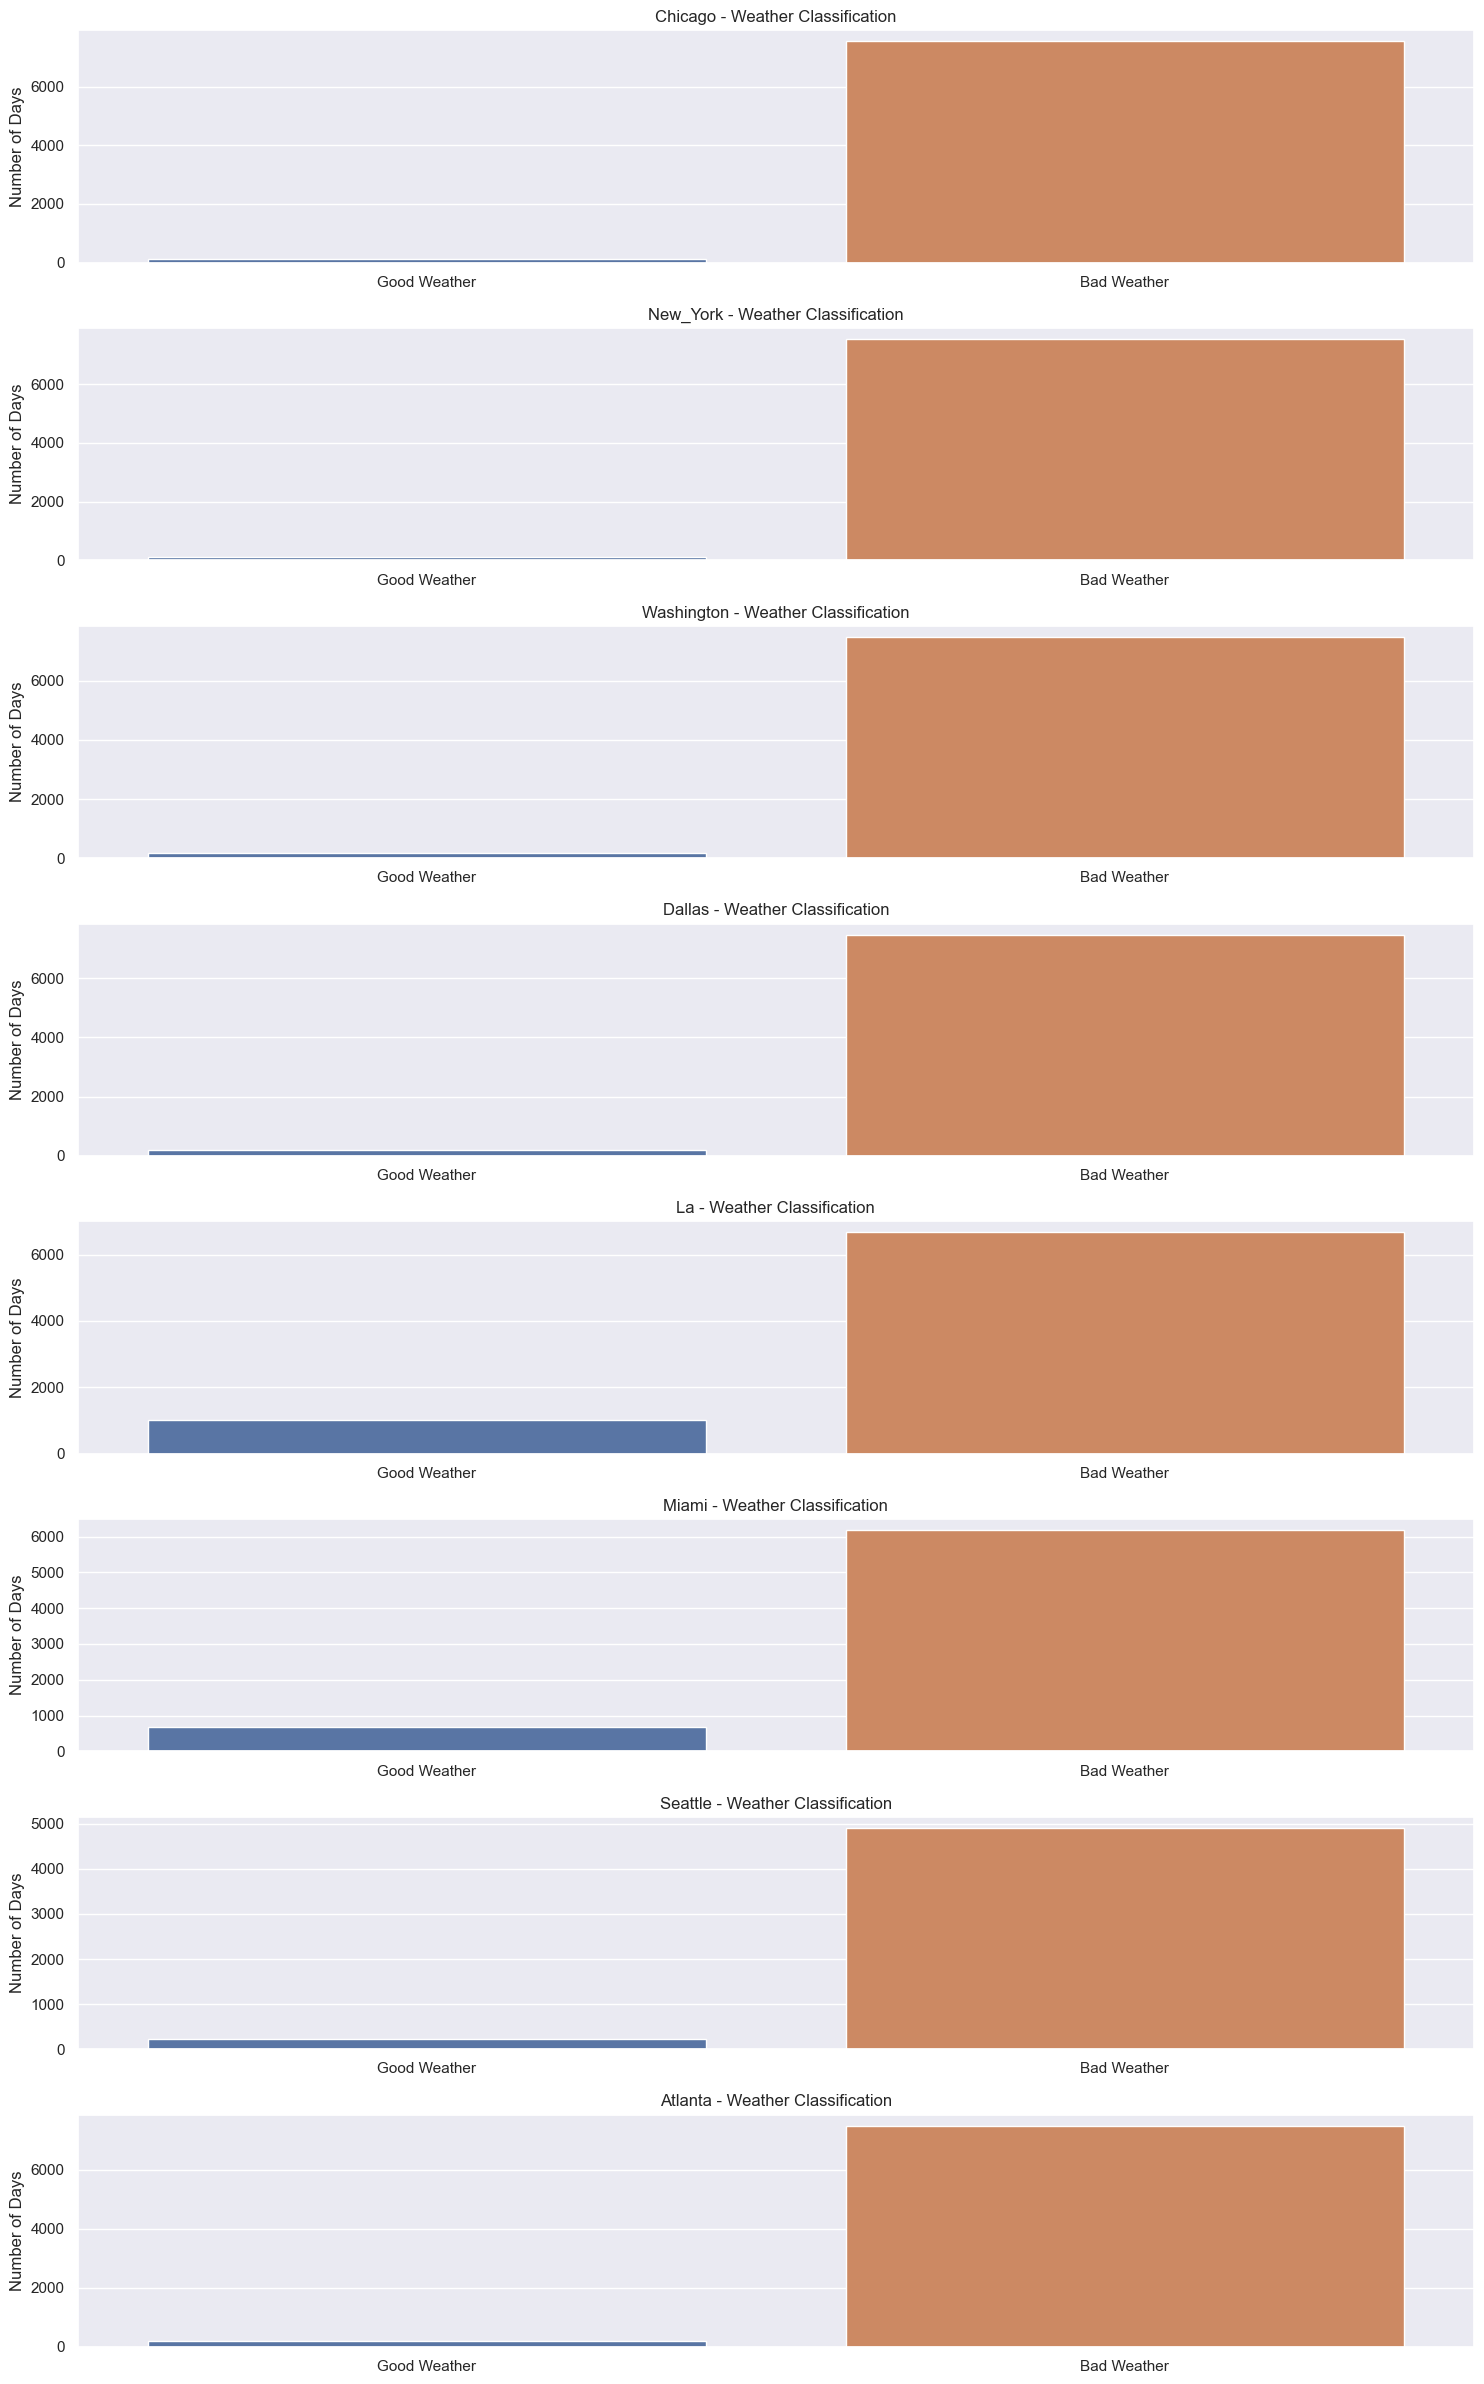

In [25]:

sns.set(style="darkgrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(cities), ncols=1, figsize=(15, 3 * len(cities))) 

for i, city in enumerate(cities):
    # Count the number of days with good and bad weather
    good_days = globals()[city]['WEATHER_STATUS'].sum()
    bad_days = len(globals()[city]) - good_days

    # Plot the results using Seaborn barplot
    sns.barplot(x=['Good Weather', 'Bad Weather'], y=[good_days, bad_days], ax=axes[i])
    axes[i].set_title(f'{city.title()} - Weather Classification')
    axes[i].set_ylabel('Number of Days')

plt.tight_layout()
plt.show()
